# D206 Data Cleaning
#### By: Orland Cole Malphrus
#### 5/2/2021

## PART I: Research Question
#### A:  Describe one question or decision that you will address using the data set you chose.
 Can we accurately predict which individual patients are likey to require redamission based on their patient profile? That is, can we create a model that will identify the likleyhood of readmission based on data collected during the initial visit? Furthermore to address this question, we must address the question of which individual data features correlate with the readmission rate.

### B: Describe the variables in the data set 

The data set contains 10,000 patient records from a hospital that hopes to assess the likelihood of patient readmission. The data set contains a column labeled “ReAdmis” which is the target variable in the analysis. The Readmission data point is a categorical variable that is boolean. The readmission data point reads “yes” if the patient was readmitted to the hospital within a month. 

The data set is also comprised of many other independent variables that must be considered. These variables will be assessed to determine potential predictors of our target variable. These variables fall into four main categories.

1. Patient medical condition: medical condition data points are primarily categorical and contain boolean “yes/no” or “0/1” values. For example, the data set contains a “BackPain” column where if the patient has back chronic back pain the column would contain a “yes” value and if the patient does not have chronic back pain the value would be “no”. high blood pressure, stroke, obesity, arthritis, diabetes, and a few others follow this same pattern. The “VitD_levels” column is an example of an exception to this pattern as this data column Mesures Vitamine D levels as a numerical value.
2. Patient Information: patient information columns are columns that contain information about the patient’s stay. This includes information such as the type of initial admission, treatments received, and the number of days hospitalized. The patient information contains categorical data exemplified by the type of initial admission which is broken down into three categories “emergency admission”, “elective admission”, “observation”. The patient information also contains numerical data such as the number of days hospitalized which contains a count of the number of days the patient stayed in the hospital.
3. patient demographic information: the patient demographic data includes items such as the geographic location, income level, age, and regional population. This data categorical data based such as the country of residence on the patients billing address as well as numerical data such as the income of the patient.
4. Survey Data: The survey data contains 8 questions about the perceived importance of certain aspects of the hospital experience. The data points are stored as numerical ratings on a scale of 1 to 8 with 1 being most important and being the least important.


## Part II: Data Cleaning Plan

### C: Explain the plan for cleaning the data by doing the following:

#### C1. The Approach that will be used to discover anomalies in the data:
1. The data will be imported from the CSV file and into a python pandas DataFrame.
2. The data labels will be identified and checked for alignment with the data dictionary provided by the hospital.
3. A new Index field will be created if one is not satasfoctoraly provided in the pre existing data set.
4. The data sets columns will be scanned to discover columns with missing values. These columns will be noted for further action when it comes to mitigating abnormalities. This will be done using pandas built in null and na checking.
5. Columns in the data frame that contain numerical values will be anylized using matplotlib’s box plot functionality. This will aim to identify columns with outliers that could potentially be anomalies. 
6. The 8 survey items in the data set will be anylized separately from the other numerical values. Since the data dictionary specifies the range of values allowed on the survey as numbers between one and 8 we can scan for anomalies with a pandas min and max functions.


In [1]:
# TODO justification of aproach

In [2]:
# TODO justification of tools

#### C4: Code 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
# using pandas read_csv method we are able to read in the data from the csv file
# by setting pd options we are able to ensure that our data columns are not truncated allowing 
# us to be able to view all columns provided
df = pd.read_csv('./medical_raw_data.csv')
pd.set_option('display.max_columns', 55)

In [5]:
# by utilizing the dataframes head method we can view the first 5 rows of our dat aframe
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


##### Observations after visual review of data structure
1. Their is an unamed row that apears in our data set containing an integer value. Although it apears to be an index row it would be unsave to make such an assumption as it does not show this in the data dictionary. There for to midigate confusion it will be removed. 
2. Their does not apear to be an index row in the data frame that adhears to the python convention of indexing begining with 0. due to this an index will be created and added to the dataframe.
3. The columns  "Overweight" and "Anxietey" store boolean values as 0 or 1. While this may be acceptable in many data sets it deviates from the standards set forth in the data dictionary. To mitigate this we will convert the 0 values to "no" and the 1 values to "yes" to better comply with the standards of the data set.


In [6]:
# Removing the unnamed and unidentified  column from the dataset
# adding an "ID" column for reference thruout the cleaning process
df.drop("Unnamed: 0", axis=1, inplace=True)
df["ID"] = pd.Series(range(0,10000))

In [7]:
# Lising columns to insure the unnamed column has been fropped and the id column has been added
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job',
       'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital',
       'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten',
       'VitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8', 'ID'],
      dtype='object')

In [8]:
# defined a dunction to convert digital booleans into strings complient with our data dictionary
# used pandas apply method and a lambda function to converet the "Anxiety" and "Overweight" columns to 
# a complient format
# Then reused the head method to ensure the change had been made sucsesfully
def digitalBool_to_string(s):
    if s == 1.0 or s == "Yes":
        return "Yes"
    elif s == 0.0 or s == "No":
        return "No"
    else:
        return np.nan

df["Anxiety"] = df["Anxiety"].apply(lambda s: digitalBool_to_string(s))
df["Overweight"] = df["Overweight"].apply(lambda s: digitalBool_to_string(s))
df.head() 

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,ID
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4,0
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3,1
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3,2
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5,3
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3,4


#### searching for missing values in data

In [9]:
# Gathering the sum of all null values by column
# Filtering out columns that have a count of 0 indicating no null values found
# displaying the number of rows with null values by column
count_of_null_by_column = df.isnull().sum()
nonzero = count_of_null_by_column > 0
count_of_null_by_column[nonzero]

Children        2588
Age             2414
Income          2464
Soft_drink      2467
Overweight       982
Anxiety          984
Initial_days    1056
dtype: int64

In [10]:
# Calculating the percentage of null values in each row
# Filtering out columns that have a count of 0 indicating no null values found
# displaying the percentage of rows with null values by column
percentage_of_null_by_column = (df.isnull().sum() / 10000) * 100
nonzero = percentage_of_null_by_column > 0

percentage_of_null_by_column[nonzero]

Children        25.88
Age             24.14
Income          24.64
Soft_drink      24.67
Overweight       9.82
Anxiety          9.84
Initial_days    10.56
dtype: float64

#### Mitigation of missing variable
Unfortunatly our data set is missing a large amount of data. Do to this we are forced to employ mitigation tactics to ensure our future anylasis is not adversly affected. We will do this in the following ways.
1. The "Overweight","Anxiety", "Soft_drink" columns all contain boolean values of either yes or no. for theas columns we will add a third categorical options which is "Unknown". The reason for this choice is the large percentage off missing data. Imputing the most common of the boolean values could greatly skew mesears of central tendency and imputing yes no values based on known distrabutions would create unwanted noise in the data. The new unknown category may also be its own valid point of interest in the data as patterns may apear aound the missing information.
2. "Children","Age", "Income", "Initial_days" ...

In [11]:
# using pandas describe function to asses the data before midigation
df.loc[:,["Overweight","Anxiety", "Soft_drink"]].describe()

,Overweight,Anxiety,Soft_drink
count,9018,9016,7533
unique,2,2,2
top,Yes,No,No
freq,6395,6110,5589


In [12]:
df["Overweight"].fillna("Unknown", inplace=True)
df["Anxiety"].fillna("Unknown", inplace=True)
df["Soft_drink"].fillna("Unknown", inplace=True)

In [13]:
#This code is the same as previously used to show percentages of missing values by rows
#used here to show the sucsess of midigation

# Calculating the percentage of null values in each row
# Filtering out columns that have a count of 0 indicating no null values found
# displaying the percentage of rows with null values by column
percentage_of_null_by_column = (df.isnull().sum() / 10000) * 100
nonzero = percentage_of_null_by_column > 0

percentage_of_null_by_column[nonzero]

Children        25.88
Age             24.14
Income          24.64
Initial_days    10.56
dtype: float64

##### Midigation of missing numerical values

In [14]:
# # using pandas describe function to asses the data before midigation
df.loc[:,["Children","Age", "Income", "Initial_days"]].describe()

,Children,Age,Income,Initial_days
count,7412.000000,7586.000000,7536.000000,8944.000000
mean,2.098219,53.295676,40484.438268,34.432082
std,2.155427,20.659182,28664.861050,26.287050
min,0.000000,18.000000,154.080000,1.001981
25%,0.000000,35.000000,19450.792500,7.911709
50%,1.000000,53.000000,33942.280000,34.446941
75%,3.000000,71.000000,54075.235000,61.124654
max,10.000000,89.000000,207249.130000,71.981486


In [34]:
df["Children"].fillna(df["Children"].mean(), inplace=True)
df["Income"].fillna(df["Income"].mean(), inplace=True)
df["Initial_days"].fillna(df["Initial_days"].mean(), inplace=True)
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [35]:
#This code is the same as previously used to show percentages of missing values by rows
#used here to show the sucsess of midigation

# Calculating the percentage of null values in each row
# Filtering out columns that have a count of 0 indicating no null values found
# displaying the percentage of rows with null values by column
percentage_of_null_by_column = (df.isnull().sum() / 10000) * 100
nonzero = percentage_of_null_by_column > 0

percentage_of_null_by_column[nonzero]

Series([], dtype: float64)

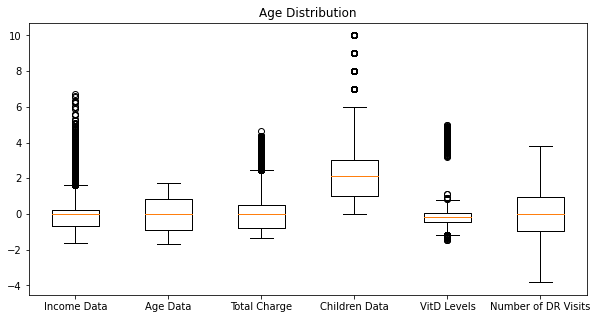

In [19]:
boolLI = df["Age"].isnull()
age_data = df.loc[~boolLI , "Age"]
boolLI = df["Income"].isnull()
income_data = df.loc[~boolLI , "Income"]
boolLI = df["TotalCharge"].isnull()
charge_data = df.loc[~boolLI , "TotalCharge"]
boolLI = df["Children"].isnull()
children_data = df.loc[~boolLI , "Children"]
boolLI = df["VitD_levels"].isnull()
vitd_data = df.loc[~boolLI , "VitD_levels"]
boolLI = df["Doc_visits"].isnull()
docvisit_data = df.loc[~boolLI , "Doc_visits"]


std_income_data = (income_data - income_data.mean()) /income_data.std()
std_age_data = (age_data - age_data.mean()) /age_data.std()
std_total_charge = (charge_data - charge_data.mean()) /charge_data.std()
std_children_data = (children_data - children_data.mean()) /children_data.std()
std_vitd_data = (vitd_data - vitd_data.mean()) /vitd_data.std()
std_docvisit_data = (docvisit_data - docvisit_data.mean()) /docvisit_data.std()

plt.figure(figsize=(10,5)) 
plt.title("Age Distribution")
plt.boxplot([
    std_income_data,
    std_age_data,
    std_total_charge,
    children_data,
    std_vitd_data,
    std_docvisit_data
]) 
plt.xticks([1,2,3,4,5, 6],[
    "Income Data",
    "Age Data",
    "Total Charge",
    "Children Data",
    "VitD Levels",
    "Number of DR Visits"
])
plt.show()

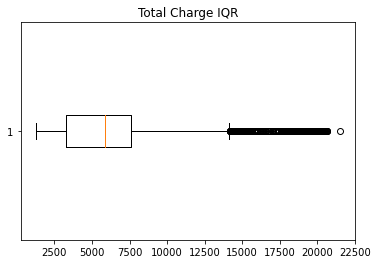

-1.3722986051235244

In [20]:
plt.boxplot(charge_data, vert = 0)
plt.title("Total Charge IQR")
plt.show()
min(stats.zscore(charge_data))

In [21]:
df.shape

(10000, 53)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  float64
 15  Age                 7586 non-null   float64
 16  Educa

In [23]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,ID
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.000000,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,Unknown,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4,0
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.000000,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,Unknown,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3,1
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.000000,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,Unknown,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3,2
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.000000,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,Unknown,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5,3
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,2.098219,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3,4


In [24]:
df[["Anxiety", "Diabetes"]]

,Anxiety,Diabetes
0,Yes,Yes
1,Unknown,No
2,Unknown,Yes
3,Unknown,No
4,No,No
...,...,...
9995,Yes,No
9996,No,Yes
9997,Yes,No
9998,No,No


In [25]:
df.loc[60:70, "Diabetes":"Anxiety"]

,Diabetes,Hyperlipidemia,BackPain,Anxiety
60,No,No,No,No
61,Yes,No,Yes,Yes
62,No,Yes,Yes,Yes
63,No,No,Yes,Yes
64,Yes,No,Yes,No
65,No,Yes,No,Yes
66,No,No,No,No
67,Yes,No,No,Unknown
68,No,No,No,Yes
69,No,No,No,No


In [26]:
df.loc[:,"Initial_admin"].value_counts()

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

In [27]:
df.index


RangeIndex(start=0, stop=10000, step=1)

In [28]:
type(df.loc[1,"Anxiety"])

str

In [29]:
anx = df["Anxiety"].isnull()

In [30]:
anx.value_counts()

False    10000
Name: Anxiety, dtype: int64

In [31]:
anx_set = df["Anxiety"]

In [32]:
anx_set = anx_set[anx]

In [33]:
anx_set

Series([], Name: Anxiety, dtype: object)